# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# Memuat Dataset
df_student = pd.read_csv('/content/StudentsPerformance.csv')
df_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# melihat tipe data yang ada dalam datset
print("\nInformasi Dataset:")
df_student.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Mendeteksi missing value
print("\nCek Missing Value:")
print(df_student.isnull().sum())


Cek Missing Value:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
# Mendeteksi data duplikat
duplicate_count = df_student.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 0


In [7]:
# Mendeteksi outlier dengan IQR
def cek_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column} - Jumlah outlier: {len(outliers)}")
    if len(outliers) > 0:
        print("→ Terdeteksi outlier.")
    else:
        print("→ Tidak ada outlier.")

# Cek semua skor
for kolom in ['math score', 'reading score', 'writing score']:
    cek_outlier_iqr(df_student, kolom)
    print()

math score - Jumlah outlier: 8
→ Terdeteksi outlier.

reading score - Jumlah outlier: 6
→ Terdeteksi outlier.

writing score - Jumlah outlier: 5
→ Terdeteksi outlier.



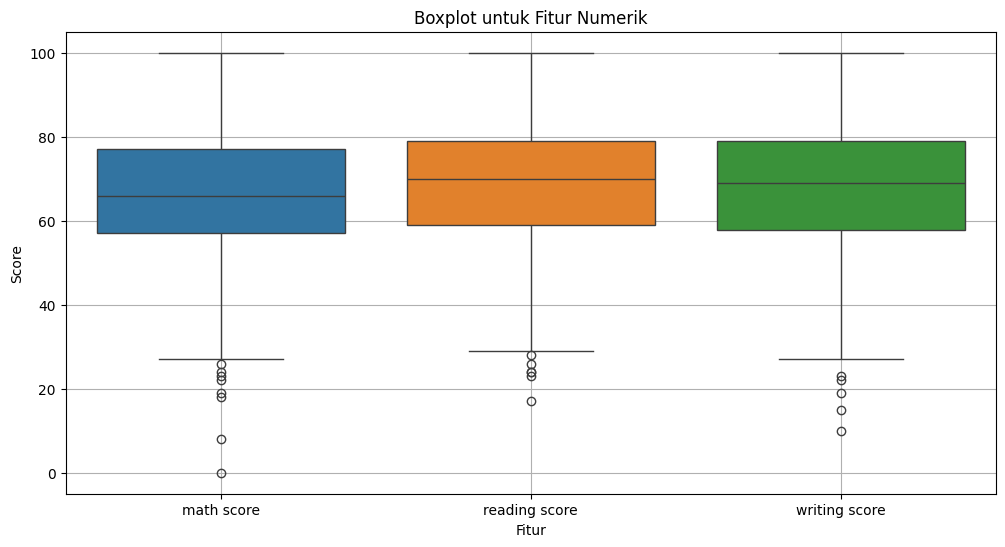

In [8]:
# Boxplot untuk semua fitur numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_student[['math score', 'reading score', 'writing score']])
plt.title('Boxplot untuk Fitur Numerik')
plt.ylabel('Score')
plt.xlabel('Fitur')
plt.grid(True)
plt.show()

<ipython-input-9-1480880619>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_student, x='gender', palette='pastel')


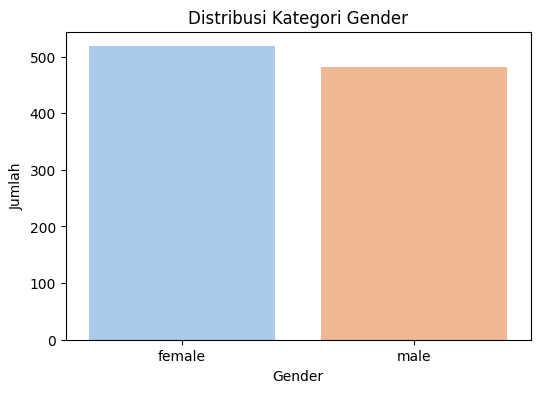

In [9]:
# Countplot Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_student, x='gender', palette='pastel')
plt.title('Distribusi Kategori Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

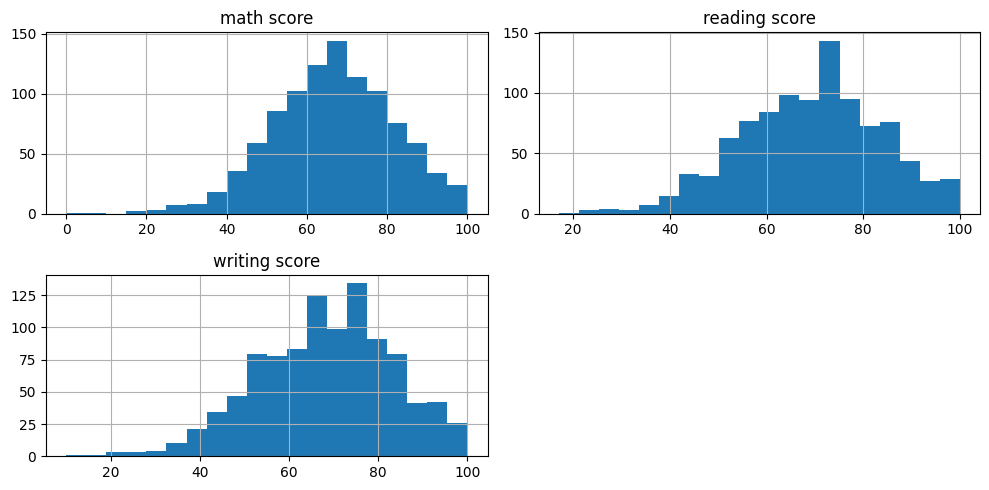

In [10]:
# Visualisasi skor ujian
df_student[['math score', 'reading score', 'writing score']].hist(figsize=(10,5), bins=20)
plt.tight_layout()
plt.show()

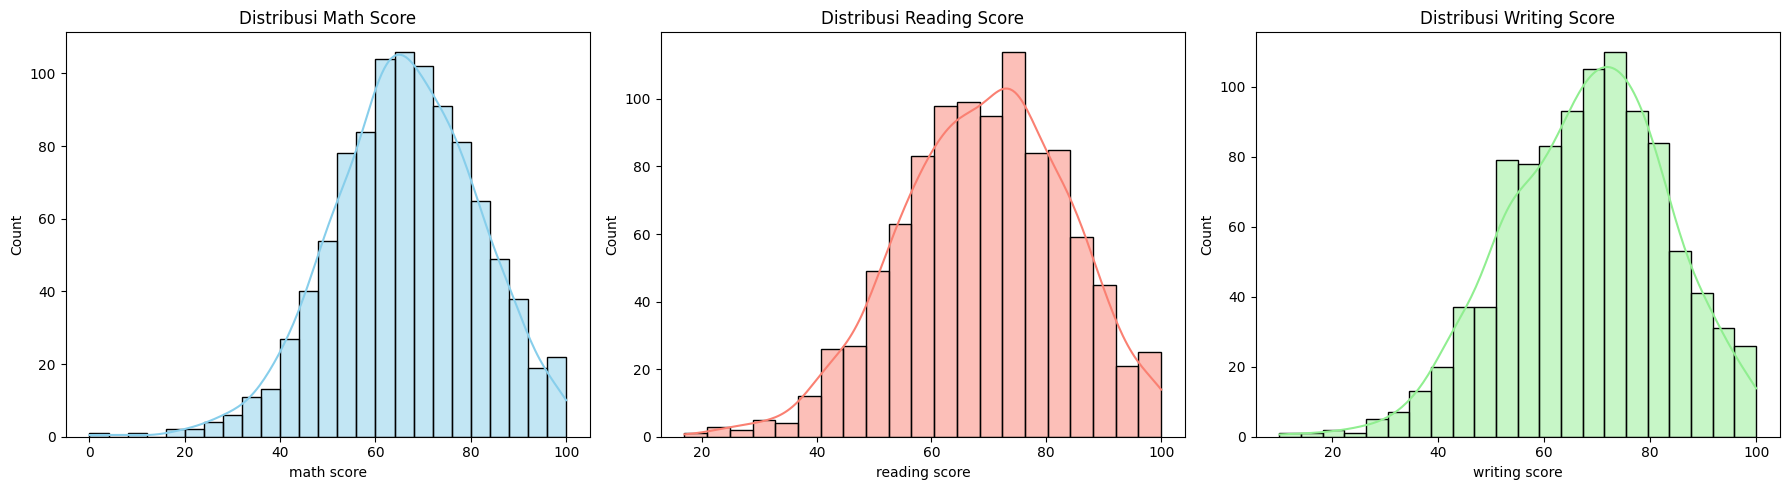

In [11]:
#  Histogram (distribusi) untuk masing-masing skor
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_student['math score'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribusi Math Score')

sns.histplot(df_student['reading score'], kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Distribusi Reading Score')

sns.histplot(df_student['writing score'], kde=True, ax=axs[2], color='lightgreen')
axs[2].set_title('Distribusi Writing Score')

plt.tight_layout()
plt.show()

<ipython-input-13-3148023259>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_student, x='gender', y='average_score', palette='pastel')


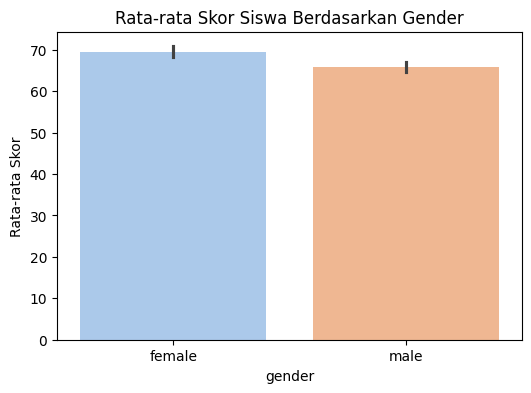

In [13]:
# Rata-rata skor berdasarkan gender
df_student['average_score'] = df_student[['math score', 'reading score', 'writing score']].mean(axis=1)

plt.figure(figsize=(6,4))
sns.barplot(data=df_student, x='gender', y='average_score', palette='pastel')
plt.title('Rata-rata Skor Siswa Berdasarkan Gender')
plt.ylabel('Rata-rata Skor')
plt.show()

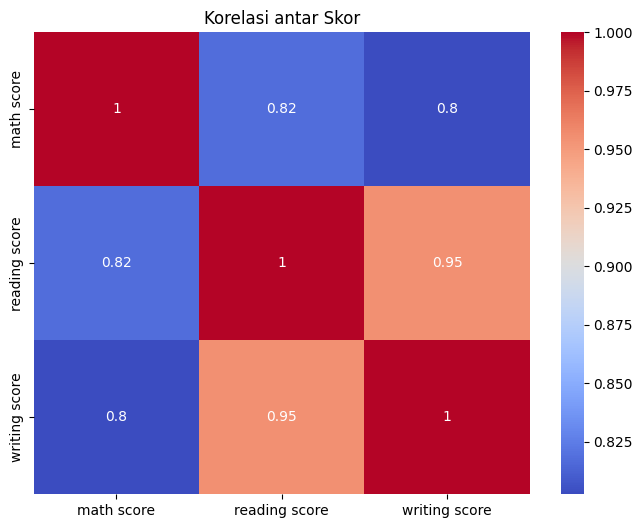

In [14]:
# Korelasi antar skor
plt.figure(figsize=(8,6))
sns.heatmap(df_student[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Skor")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
# Mendeteksi kembali apakah missing value atau tidak
print("\nCek Missing Value:")
print(df_student.isnull().sum())


Cek Missing Value:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64


In [16]:
# Mendeteksi kembali data duplikat
duplicate_count = df_student.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 0


In [17]:
# Menghapus Outlier berdasarkan IQR
def hapus_outlier_iqr(df_student, column):
    Q1 = df_student[column].quantile(0.25)
    Q3 = df_student[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_bersih = df_student[(df_student[column] >= lower_bound) & (df_student[column] <= upper_bound)]
    return df_bersih

# Hapus outlier dari semua skor
for col in ['math score', 'reading score', 'writing score']:
    df_student = hapus_outlier_iqr(df_student, col)

# cek apakah sudah terhapus blm
for kolom in ['math score', 'reading score', 'writing score']:
    cek_outlier_iqr(df_student, kolom)

math score - Jumlah outlier: 0
→ Tidak ada outlier.
reading score - Jumlah outlier: 0
→ Tidak ada outlier.
writing score - Jumlah outlier: 0
→ Tidak ada outlier.


In [18]:
# Encode data kategorikal
from sklearn.preprocessing import LabelEncoder
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = df_student.copy()
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [19]:
# Membuat label klasifikasi: lulus semua jika semua skor >= 60
threshold = 60
df_encoded['pass_all'] = ((df_student[['math score', 'reading score', 'writing score']] >= threshold).all(axis=1)).astype(int)

In [20]:
# Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['math score', 'reading score', 'writing score']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("\nData setelah normalisasi:")
print(df_encoded.head())


Data setelah normalisasi:
   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  \
0                        1    0.370131       0.163761       0.371152   
1                        0    0.160831       1.458384       1.342041   
2                        1    1.625930       1.818002       1.688787   
3                        1   -1.374034      -0.915092      -1.709324   
4                        1    0.649197       0.595302       0.440501   

   average_score  pass_all  
0      72.666667         1  
1      82.333333         1  
2      92.666667         1  
3      49.333333         0  
4   

In [21]:
# Binning (Pengelompokan Data)
# Mengelompokkan math score ke dalam 3 kategori: Low, Medium, High
df_encoded['math_score_bin'] = pd.cut(df_student['math score'],
                                      bins=[0, 60, 80, 100],
                                      labels=['Low', 'Medium', 'High'])

print("\nDistribusi kategori math_score_bin:")
print(df_encoded['math_score_bin'].value_counts())


Distribusi kategori math_score_bin:
math_score_bin
Medium    485
Low       325
High      176
Name: count, dtype: int64


In [23]:
# 6. Membagi Dataset menjadi Data Latih dan Uji
X = df_encoded.drop('pass_all', axis=1)
y = df_encoded['pass_all']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nJumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 690
Jumlah data uji: 296
